In [9]:
import pandas as pd

train_df = pd.read_csv("/Users/rangasamyelancheziyan/Desktop/PROJECT 3/data set/train.csv")
test_df = pd.read_csv("/Users/rangasamyelancheziyan/Desktop/PROJECT 3/data set/test.csv")
submission_df = pd.read_csv("/Users/rangasamyelancheziyan/Desktop/PROJECT 3/data set/sample_submission.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Submission shape:", submission_df.shape)


Train shape: (1200000, 21)
Test shape: (800000, 20)
Submission shape: (800000, 2)


In [10]:
train_df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [11]:
TARGET = "Premium Amount"


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [13]:
train_df.isnull().sum().sort_values(ascending=False)

Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
id                           0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Policy Type                  0
Policy Start Date            0
Location                     0
Education Level              0
Gender                       0
Premium Amount               0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

num_cols = [
    'Previous Claims', 'Credit Score', 'Number of Dependents',
    'Health Score', 'Annual Income', 'Age',
    'Vehicle Age', 'Insurance Duration'
]

num_imputer = SimpleImputer(strategy='median')


In [15]:
cat_cols = [
    'Occupation', 'Marital Status',
    'Property Type', 'Exercise Frequency',
    'Smoking Status', 'Policy Type',
    'Location', 'Education Level', 'Gender'
]

cat_imputer = SimpleImputer(strategy='most_frequent')


In [16]:
train_df.drop(columns=['Customer Feedback'], inplace=True)
test_df.drop(columns=['Customer Feedback'], inplace=True)


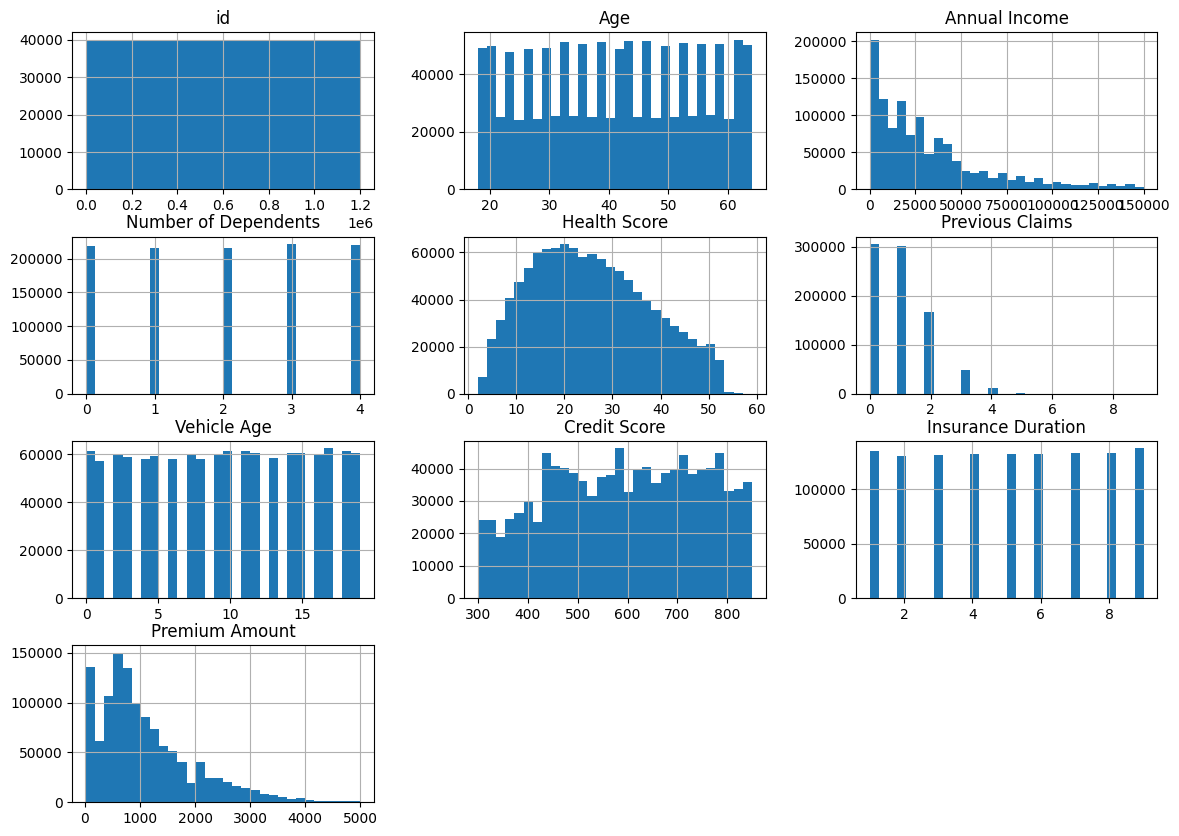

In [10]:
import matplotlib.pyplot as plt

num_cols = train_df.select_dtypes(include=['int64','float64']).columns

train_df[num_cols].hist(figsize=(14,10), bins=30)
plt.show()


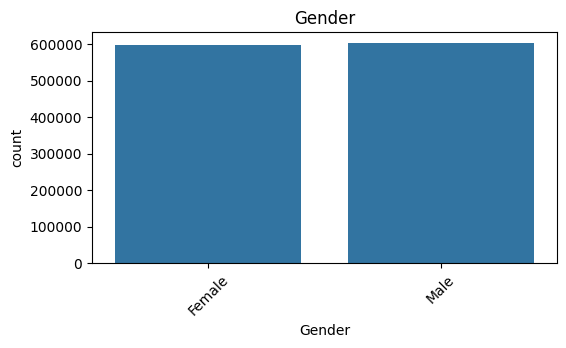

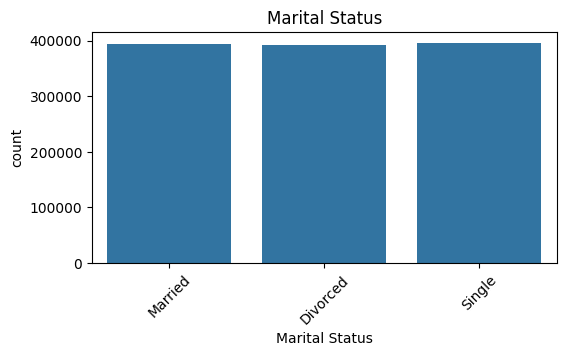

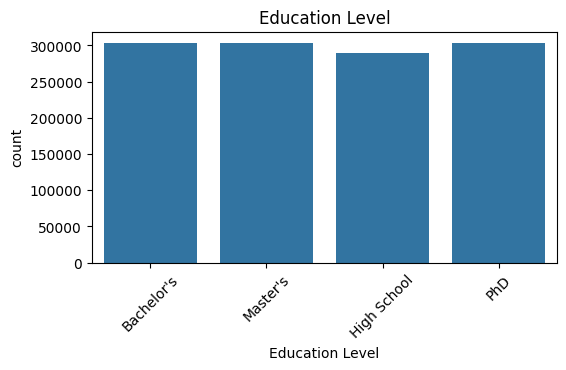

KeyboardInterrupt: 

In [12]:
import seaborn as sns

cat_cols = train_df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=train_df)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


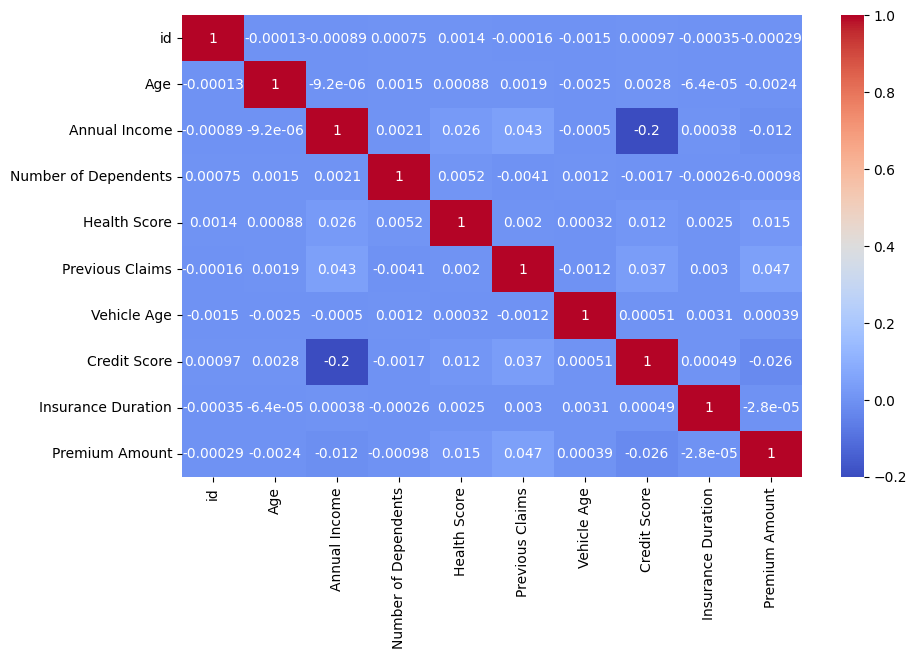

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
test_df.info()
test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [18]:
num_cols = [
    'Previous Claims', 'Credit Score', 'Number of Dependents',
    'Health Score', 'Annual Income', 'Age',
    'Vehicle Age', 'Insurance Duration'
]


In [19]:
cat_cols = [
    'Occupation', 'Marital Status',
    'Education Level', 'Location',
    'Policy Type', 'Smoking Status',
    'Exercise Frequency', 'Property Type', 'Gender'
]


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])


In [21]:
from sklearn.impute import SimpleImputer

# Separate features and target
TARGET = "Premium Amount"
X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

lr_preds = lr_pipeline.predict(X_eval)
lr_rmse, lr_mae, lr_r2 = evaluate_model(y_eval, lr_preds)

print("Linear Regression:")
print("RMSE:", lr_rmse)
print("MAE :", lr_mae)
print("R²  :", lr_r2)


Linear Regression:
RMSE: 947.5120106593798
MAE : 724.288674263458
R²  : -0.20138676165281777


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

tree_preprocessor = ColumnTransformer(
    transformers=[
        (
            'cat',
            Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(
                    handle_unknown='ignore',
                    min_frequency=0.05,   # 🔥 reduce rare categories
                    sparse_output=True   # ✅ FIX HERE
                ))
            ]),
            cat_cols
        ),
        (
            'num',
            SimpleImputer(strategy='median'),
            num_cols
        )
    ]
)


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_pipeline = Pipeline([
    ('preprocess', tree_preprocessor),
    ('model', DecisionTreeRegressor(
        max_depth=12,
        min_samples_leaf=10,
        random_state=42
    ))
])

dt_pipeline.fit(X_train, y_train)

dt_preds = dt_pipeline.predict(X_eval)
dt_rmse, dt_mae, dt_r2 = evaluate_model(y_eval, dt_preds)

print("Decision Tree:")
print("RMSE:", dt_rmse)
print("MAE :", dt_mae)
print("R²  :", dt_r2)


Decision Tree:
RMSE: 854.627118860684
MAE : 647.4905175628985
R²  : 0.022612605068285996


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=50,
        max_depth=15,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

rf_preds = rf_pipeline.predict(X_eval)
rf_rmse, rf_mae, rf_r2 = evaluate_model(y_eval, rf_preds)

print("Random Forest:")
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R²  :", rf_r2)


Random Forest:
RMSE: 864.2272118604712
MAE : 668.3734665856314
R²  : 0.0005311388465301103


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

preprocessor_fast = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), cat_cols),
        ('num', SimpleImputer(strategy='median'), num_cols)
    ]
)


In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline

hgb_pipeline = Pipeline([
    ('preprocess', preprocessor_fast),
    ('model', HistGradientBoostingRegressor(
        max_depth=8,
        learning_rate=0.05,
        max_iter=200,
        random_state=42
    ))
])

hgb_pipeline.fit(X_train, y_train)

preds = hgb_pipeline.predict(X_eval)
hgb_rmse, hgb_mae, hgb_r2 = evaluate_model(y_eval, preds)

print("HistGradientBoosting:")
print("RMSE:",hgb_rmse)
print("MAE :", hgb_mae)
print("R²  :", hgb_r2)


HistGradientBoosting:
RMSE: 844.4335590251205
MAE : 643.502852201498
R²  : 0.04578912152447201


In [45]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest","HistGradientBoostingRegressor"],
    "RMSE": [lr_rmse, dt_rmse, rf_rmse, hgb_rmse],
    "MAE": [lr_mae, dt_mae, rf_mae, hgb_mae],
    "R2 Score": [lr_r2, dt_r2, rf_r2,hgb_r2]
})

results


,Model,RMSE,MAE,R2 Score
0,Linear Regression,947.512011,724.288674,-0.201387
1,Decision Tree,854.627119,647.490518,0.022613
2,Random Forest,864.227212,668.373467,0.000531
3,HistGradientBoostingRegressor,844.433559,643.502852,0.045789


In [46]:
best_row = results.loc[results["RMSE"].idxmin()]

print("Best Model:", best_row["Model"])
print("RMSE:", best_row["RMSE"])
print("MAE :", best_row["MAE"])
print("R²  :", best_row["R2 Score"])


Best Model: HistGradientBoostingRegressor
RMSE: 844.4335590251205
MAE : 643.502852201498
R²  : 0.04578912152447201


In [47]:
models = {
    "Linear Regression": (lr_pipeline, lr_rmse),
    "Decision Tree": (dt_pipeline, dt_rmse),
    "Random Forest": (rf_pipeline, rf_rmse),
    "HistGradientBoostingRegressor": (hgb_pipeline, hgb_rmse)
}

best_model_name = min(models, key=lambda k: models[k][1])
best_model_pipeline = models[best_model_name][0]

print("✅ Best Model:", best_model_name)


✅ Best Model: HistGradientBoostingRegressor


In [48]:
import joblib

joblib.dump(best_model_pipeline, "best_insurance_model.pkl")

print("✅ Model saved as best_insurance_model.pkl")


✅ Model saved as best_insurance_model.pkl


In [41]:
best_model = hgb_pipeline